
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [ ]:
X.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size =0.3)


In [ ]:
print(f'Xtrain.shape: {Xtrain.shape}')
print(f'Xtest.shape: {Xtest.shape}')


Xtrain.shape: (124, 13)
Xtest.shape: (54, 13)


**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
Xtrain_new = Xtrain[['alcohol','magnesium']]
Xtest_new = Xtest[['alcohol','magnesium']]
normalizer = StandardScaler()
normalizer.fit(Xtrain_new)

Xtrain_new = normalizer.transform(Xtrain_new)
Xtest_new = normalizer.transform(Xtest_new)

In [ ]:
Xtest_new

array([[ 0.80742634,  0.98795781],
       [ 1.48754664,  0.6612731 ],
       [-0.03974104, -0.31878105],
       [ 0.91481376,  0.00790366],
       [-0.7079294 , -1.49484604],
       [ 1.59493405,  1.24930559],
       [-1.149411  , -0.90681355],
       [ 0.5210599 ,  0.07324061],
       [-1.61475646, -0.44945494],
       [ 0.47333216, -0.77613966],
       [ 0.64037925, -0.31878105],
       [ 0.64037925,  1.44531642],
       [ 0.53299184, -0.71080272],
       [-0.230652  , -1.36417215],
       [ 0.79549441,  0.72661004],
       [-0.52895038, -0.8414766 ],
       [-1.85339516, -0.8414766 ],
       [-1.05395552, -1.49484604],
       [ 1.06992891, -0.18810717],
       [-1.05395552, -1.10282438],
       [ 1.46368277,  0.46526227],
       [ 0.17503379, -1.49484604],
       [-0.75565714,  0.00790366],
       [ 0.5210599 ,  0.72661004],
       [-0.230652  , -0.97215049],
       [ 0.97447343, -0.71080272],
       [-0.64826973,  0.46526227],
       [-0.7079294 , -0.18810717],
       [-1.05395552,

In [ ]:
k_neighb = [1, 3, 5, 10, 15, 25]

trained_classifiers = []

print("NN", 'Train', 'Test', sep ="\t" )

for k in k_neighb:
  clf = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
  clf.fit(Xtrain_new, ytrain)

  y_pred_train = clf.predict(Xtrain_new)
  y_pred_test = clf.predict(Xtest_new)

  accurasy_train = np.mean(ytrain == y_pred_train)
  accuracy_test = np.mean(ytest == y_pred_test)

  trained_classifiers.append(clf)


  print(f'{int(k)}\t{accurasy_train:.2f}\t{accuracy_test:.2f}')

NN	Train	Test
1	0.99	0.67
3	0.84	0.65
5	0.81	0.69
10	0.81	0.70
15	0.78	0.69
25	0.73	0.69


### ПРИМЕР ВЫВОДА ###
NN 	 Train 	 Test
1 	 1.0 	 0.56
3 	 0.83 	 0.61
5 	 0.81 	 0.63
10 	 0.79 	 0.54
15 	 0.74 	 0.57
25 	 0.76 	 0.56


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [ ]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

In [ ]:
trained_classifiers

[KNeighborsClassifier(metric='euclidean', n_neighbors=1),
 KNeighborsClassifier(metric='euclidean', n_neighbors=3),
 KNeighborsClassifier(metric='euclidean'),
 KNeighborsClassifier(metric='euclidean', n_neighbors=10),
 KNeighborsClassifier(metric='euclidean', n_neighbors=15),
 KNeighborsClassifier(metric='euclidean', n_neighbors=25)]

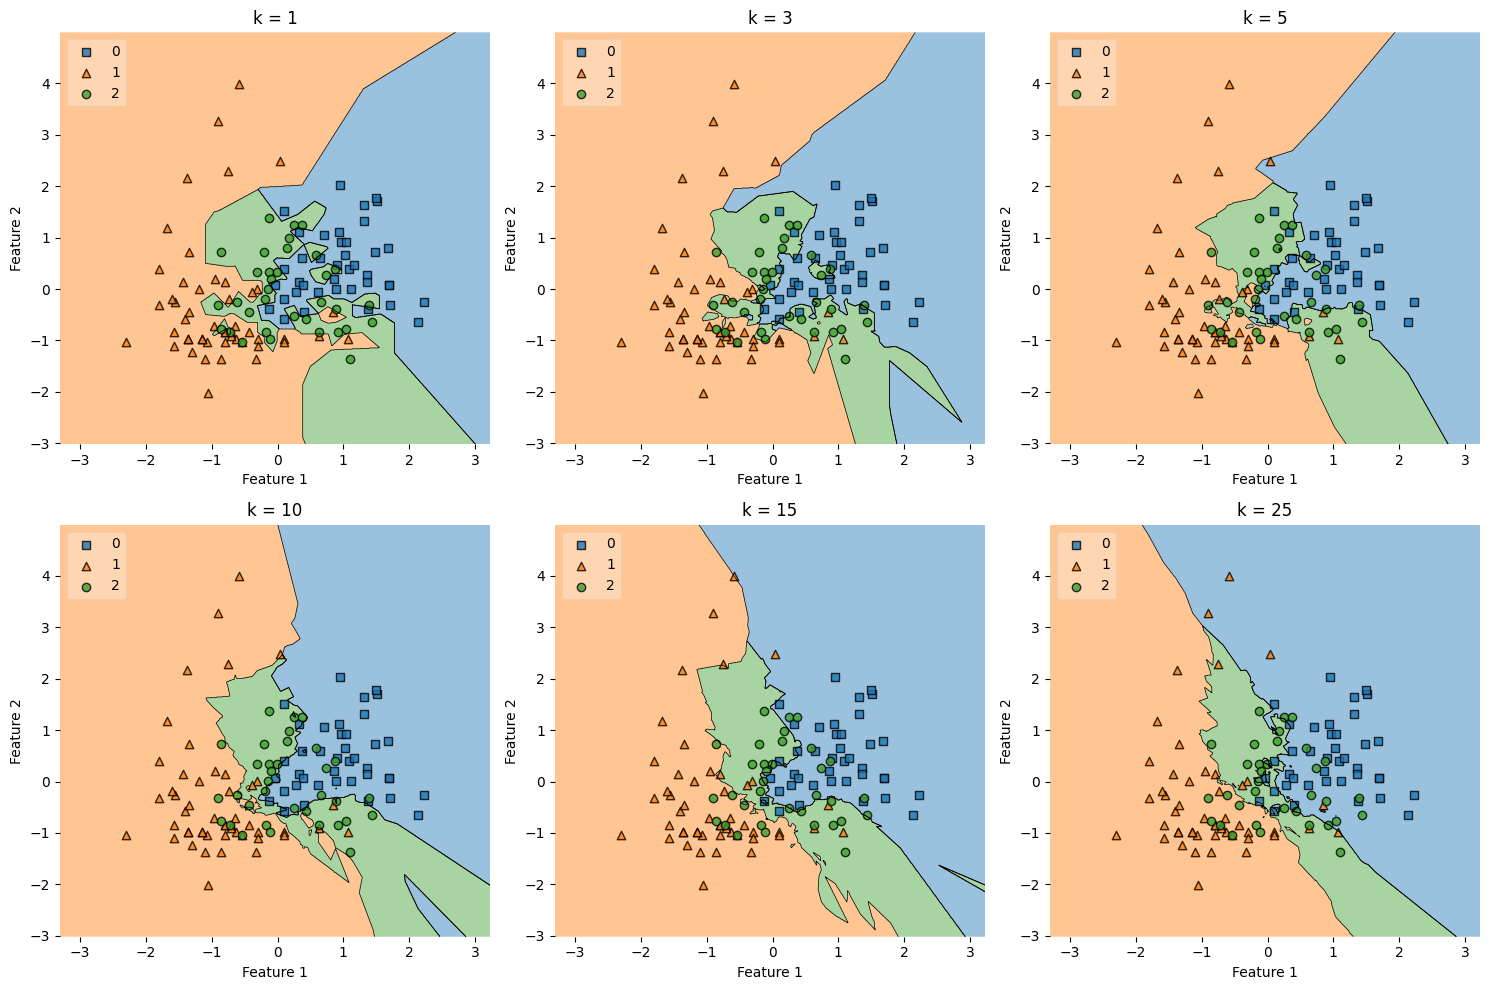

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, clf in enumerate(trained_classifiers):
    row = i // 3
    col = i % 3
    plot_decision_regions(Xtrain_new, ytrain, clf=clf, ax=axes[row, col], legend=2)
    axes[row, col].set_title(f'k = {k_neighb[i]}')
    axes[row, col].set_xlabel('Feature 1')
    axes[row, col].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

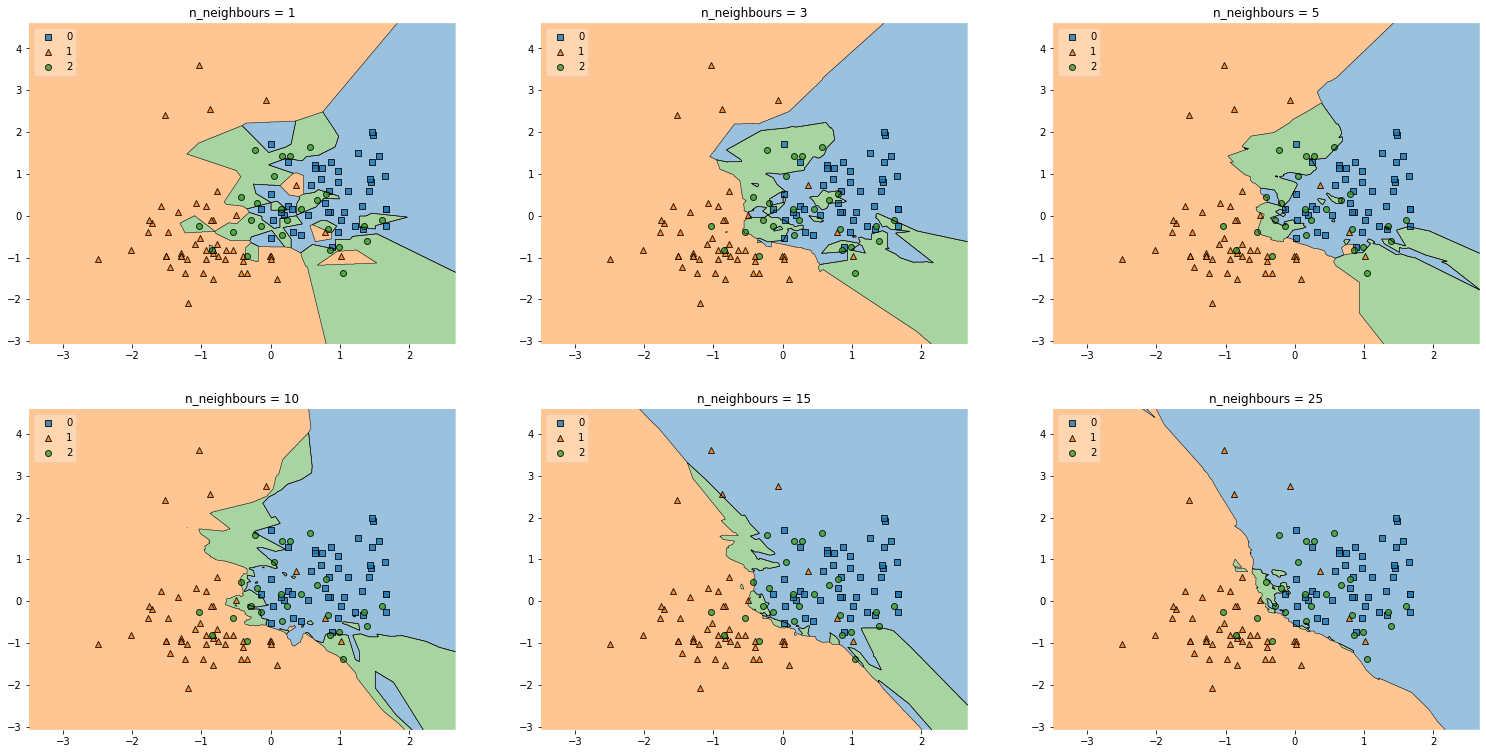

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

### Ответ
Если исходить из вычислений в задании 1.3, то лучший вариант при k=1, затем k=3,5,10

Если исходить из графиков в задании 1.5, то лучшее решение при k=1, затем k = 3, 5, 10.

Вывод: при k=1 - лучшее решение, однако, по графику можно судить что модель подстраивается под данные, что может привести к переобучению. Поэтому лучше выбрать из k=3, 5, 10. Рекмендую остановить выбор на k=5, т.к. решение пусть на train как и у других, однако на тестовой выборке лучше, чем у других. С похожими параметрами при k=10. Зачем считать дольше, когда вычисления могут быть быстрее.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

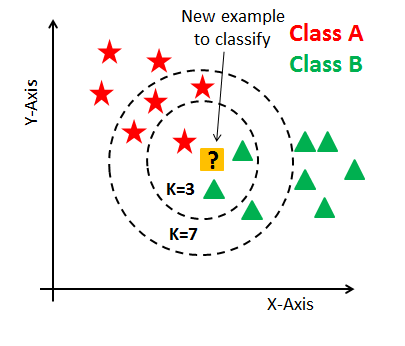

In [ ]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
      self.X = X
      self.y = y

    def predict(self, X):
      y_pred = []
      for x_new in X:
        # Вычисляем расстояния до всех точек в обучающем наборе
        distances = np.linalg.norm(self.X - x_new, axis=1)

        # Находим индексы k ближайших соседей
        nearest_indices = np.argsort(distances)[:self.k]

        # Получаем метки классов этих соседей
        nearest_labels = self.y[nearest_indices]

        # Определяем наиболее часто встречающийся класс среди соседей
        most_common_label = Counter(nearest_labels).most_common(1)[0][0]

        # Добавляем предсказанную метку класса в список предсказаний
        y_pred.append(most_common_label)

      return np.array(y_pred)

In [ ]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [ ]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [ ]:
data = pd.read_csv('/content/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data.duplicated().sum()

0

Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.

In [ ]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [ ]:
# удалим столбец Unnamed: 0
# он не несет никакой информации
data = data.drop(columns=['Unnamed: 0'])
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data.value_counts()

carat  cut      color  clarity  depth  table  price  x      y      z   
0.79   Ideal    G      SI1      62.3   57.0   2898   5.90   5.85   3.66    5
0.50   Premium  D      SI2      62.9   58.0   997    5.06   5.01   3.17    2
1.20   Premium  I      VS2      62.6   58.0   5699   6.77   6.72   4.22    2
0.52   Ideal    D      VS2      61.8   55.0   1822   5.16   5.19   3.20    2
0.41   Ideal    G      IF       61.7   56.0   1367   4.77   4.80   2.95    2
                                                                          ..
0.50   Ideal    E      VS1      61.9   56.0   1716   5.09   5.12   3.16    1
                                62.0   58.0   1755   5.09   5.14   3.17    1
                                62.2   54.0   1665   5.10   5.13   3.18    1
                                       56.0   1619   5.10   5.13   3.18    1
5.01   Fair     J      I1       65.5   59.0   18018  10.74  10.54  6.98    1
Name: count, Length: 53794, dtype: int64

**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [ ]:
data_numeric = data.select_dtypes(include=['int', 'float'])
data_numeric.corr()


,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: >

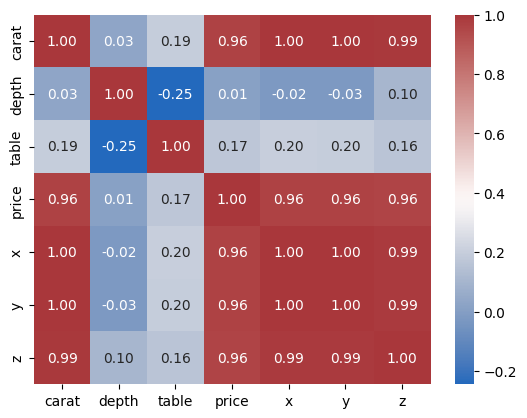

In [ ]:
sns.heatmap(data_numeric.corr(method = "spearman"), cmap="vlag", annot=True, fmt="0.2f")

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [ ]:
data_object = data.select_dtypes(include = ['object']).columns


In [ ]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data = pd.get_dummies(data, columns =  data_object, drop_first = True )

In [ ]:
data.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,True,...,False,True,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,True,False,False,...,False,False,True,False,False,True,False,False,False,False


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [ ]:
X = data.drop('price', axis = 1)
y = data["price"]

In [ ]:
X.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,3.89,3.84,2.31,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,4.05,4.07,2.31,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,4.20,4.23,2.63,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,4.34,4.35,2.75,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False


In [ ]:
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)

In [ ]:
X_train.shape, X_test.shape

((37758, 23), (16182, 23))

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [ ]:
from sklearn.preprocessing import StandardScaler

normalizer = StandardScaler()
X_train_scaled = normalizer.fit_transform(X_train)
X_test_scaled = normalizer.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [ ]:
X_train_scaled.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.445813,0.170523,-0.201734,0.630510,0.540663,0.605461,-0.316757,1.223205,-0.584466,-0.536788,...,-0.424712,-0.335399,-0.232918,-0.185726,-0.565871,-0.453467,2.379167,-0.542516,-0.269914,-0.321994
1,1.562356,0.588814,-0.649638,1.503049,1.397771,1.519486,-0.316757,1.223205,-0.584466,-0.536788,...,2.354538,-0.335399,-0.232918,-0.185726,-0.565871,-0.453467,-0.420315,-0.542516,-0.269914,3.105648
2,0.740749,0.937389,2.485693,0.799676,0.687843,0.858576,-0.316757,-0.817524,-0.584466,1.862933,...,-0.424712,-0.335399,-0.232918,-0.185726,-0.565871,2.205231,-0.420315,-0.542516,-0.269914,-0.321994
3,-0.818197,-0.805489,-0.201734,-0.838559,-0.775299,-0.871040,-0.316757,1.223205,-0.584466,-0.536788,...,-0.424712,-0.335399,-0.232918,-0.185726,-0.565871,-0.453467,2.379167,-0.542516,-0.269914,-0.321994
4,-0.544328,-0.178053,-0.201734,-0.437904,-0.411678,-0.435121,-0.316757,1.223205,-0.584466,-0.536788,...,-0.424712,-0.335399,-0.232918,-0.185726,-0.565871,-0.453467,-0.420315,-0.542516,-0.269914,3.105648


In [ ]:
X_test_scaled.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.635415,0.170523,-1.097543,0.781869,0.791735,0.802328,-0.316757,1.223205,-0.584466,-0.536788,...,2.354538,-0.335399,-0.232918,-0.185726,-0.565871,2.205231,-0.420315,-0.542516,-0.269914,-0.321994
1,1.035685,0.588814,-0.649638,1.093490,1.034149,1.139814,-0.316757,1.223205,-0.584466,-0.536788,...,2.354538,-0.335399,-0.232918,-0.185726,1.767188,-0.453467,-0.420315,-0.542516,-0.269914,-0.321994
2,0.846083,-0.456913,0.246171,1.022262,0.921600,0.900762,-0.316757,-0.817524,1.710964,-0.536788,...,-0.424712,2.981522,-0.232918,-0.185726,1.767188,-0.453467,-0.420315,-0.542516,-0.269914,-0.321994
3,1.478088,-0.596343,-0.649638,1.511952,1.406428,1.350743,-0.316757,1.223205,-0.584466,-0.536788,...,-0.424712,-0.335399,-0.232918,-0.185726,1.767188,-0.453467,-0.420315,-0.542516,-0.269914,-0.321994
4,0.214078,-0.038622,-0.201734,0.390117,0.410799,0.394533,-0.316757,-0.817524,-0.584466,1.862933,...,-0.424712,-0.335399,-0.232918,-0.185726,-0.565871,-0.453467,-0.420315,1.843265,-0.269914,-0.321994


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train_scaled, y_train)

rmse_train = mean_squared_error(y_train, lr.predict(X_train_scaled))**0.5
rmse_test = mean_squared_error(y_test, lr.predict(X_test_scaled))**0.5

print(f"rmse_train:{rmse_train:.5f}")
print(f"rmse_test:{rmse_test:.5f}")

print("r2_score_train_lr", r2_score(y_train, lr.predict(X_train_scaled)))
print('r2_score_test_lr', r2_score(y_test,lr.predict(X_test_scaled)))

rmse_train:1133.42925
rmse_test:1122.12259
r2_score_train_lr 0.9192646934980179
r2_score_test_lr 0.9209223221465277


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

* lr.coef_: Это атрибут модели линейной регрессии, который содержит значения коэффициентов для каждого признака (функции) в модели. Эти коэффициенты показывают, насколько каждый признак влияет на целевую переменную.

* lr.intercept_: Это атрибут модели линейной регрессии, который содержит значение перехвата (или константы) модели. Перехват — это значение предсказания, когда все признаки равны нулю.

In [ ]:
coefficients = lr.coef_
intercept = lr.intercept_

coef_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nCoefficients:")
print(coef_df)

# Определение переменных с наибольшими коэффициентами по модулю
significant_features = coef_df[abs(coef_df['Coefficient']) > 100]  # Пример порога
print("\nSignificant Features:")
print(significant_features)


Coefficients:
          Feature  Coefficient
0           carat  5278.119984
20    clarity_VS2  1790.842805
19    clarity_VS1  1640.463647
17    clarity_SI1  1573.204421
22   clarity_VVS2  1445.482918
21   clarity_VVS1  1263.347650
3               x -1050.024760
18    clarity_SI2  1016.237239
16     clarity_IF   957.549314
15        color_J  -517.728075
14        color_I  -430.763476
7       cut_Ideal   389.952109
13        color_H  -339.522613
8     cut_Premium   314.449843
9   cut_Very Good   291.047679
12        color_G  -182.693620
6        cut_Good   155.923708
1           depth   -94.266936
11        color_F   -90.947949
10        color_E   -69.580025
2           table   -65.618372
5               z   -40.568623
4               y    -2.647380

Significant Features:
          Feature  Coefficient
0           carat  5278.119984
20    clarity_VS2  1790.842805
19    clarity_VS1  1640.463647
17    clarity_SI1  1573.204421
22   clarity_VVS2  1445.482918
21   clarity_VVS1  1263.347650
3

###**Вывод:**
Таблицы показывают какие признаки оказывают большее влияние на целевую переменную. Чем значение больше нуля по модулю, тем влияние сильнее. Если значение около 0 - значит влияние маленькое или отсутствует. Это помогает проанализировать признаки и их значимость на целевую переменную, а так же при необходимости исключить признаки с меньшим влиянием на целевую переменную.

(array([3., 9., 3., 4., 3., 0., 0., 0., 0., 1.]),
 array([-1050.02475976,  -417.21028539,   215.60418898,   848.41866335,
         1481.23313772,  2114.04761209,  2746.86208646,  3379.67656083,
         4012.4910352 ,  4645.30550957,  5278.11998394]),
 <BarContainer object of 10 artists>)

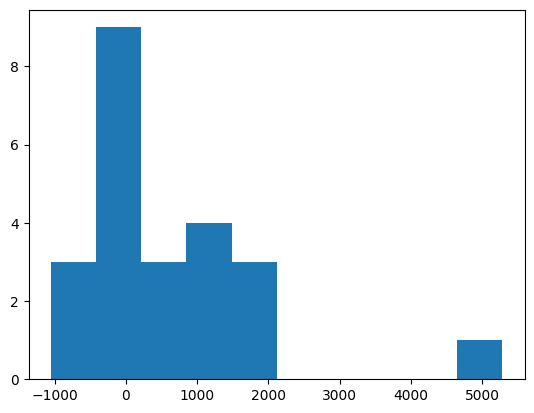

In [ ]:
plt.hist(lr.coef_)

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(10).fit(X_train_scaled, y_train)

rmse_train_ridge = mean_squared_error(y_train, ridge.predict(X_train_scaled))**0.5
rmse_test_ridge = mean_squared_error(y_test, ridge.predict(X_test_scaled))**0.5

print(f"rmse_train_ridge:{rmse_train_ridge:.5f}")
print(f'rmse_test_ridge: {rmse_test_ridge:.5f}')

print(f'r2_score_train_ridge: {r2_score(y_train,ridge.predict(X_train_scaled)):.5f}')
print(f'r2_score_test_ridge: {r2_score(y_test,ridge.predict(X_test_scaled)):.5f}')

# rmse_train:1133.42925
# rmse_test:1122.12259
# (0.9192646934980179, 0.9209223221465277)


rmse_train_ridge:1133.48285
rmse_test_ridge: 1122.51114
r2_score_train_ridge: 0.91926
r2_score_test_ridge: 0.92087


(array([3., 9., 3., 4., 3., 0., 0., 0., 0., 1.]),
 array([-1008.68974495,  -383.81751102,   241.05472292,   865.92695685,
         1490.79919079,  2115.67142472,  2740.54365866,  3365.41589259,
         3990.28812653,  4615.16036046,  5240.0325944 ]),
 <BarContainer object of 10 artists>)

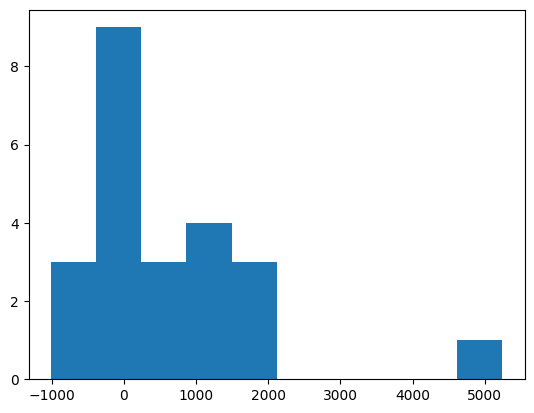

In [ ]:
plt.hist(ridge.coef_)

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(10).fit(X_train_scaled, y_train)

rmse_train_lasso = mean_squared_error(y_train, lasso.predict(X_train_scaled))**0.5
rmse_test_lasso = mean_squared_error(y_test, lasso.predict(X_test_scaled))**0.5

print(f"rmse_train_lasso:{rmse_train_lasso:.5f}")
print(f"rmse_test_lasso:{rmse_test_lasso:.5f}")

print(f'r2_score_train_lasso:{r2_score(y_train, lasso.predict(X_train_scaled)):.5f}')
print(f"r2_score_test_lasso:{r2_score(y_test, lasso.predict(X_test_scaled)):.5f}")

rmse_train_lasso:1158.90011
rmse_test_lasso:1152.79825
r2_score_train_lasso:0.91560
r2_score_test_lasso:0.91654


(array([7., 9., 4., 2., 0., 0., 0., 0., 0., 1.]),
 array([-603.5249138 ,  -64.71419861,  474.09651658, 1012.90723177,
        1551.71794695, 2090.52866214, 2629.33937733, 3168.15009252,
        3706.96080771, 4245.77152289, 4784.58223808]),
 <BarContainer object of 10 artists>)

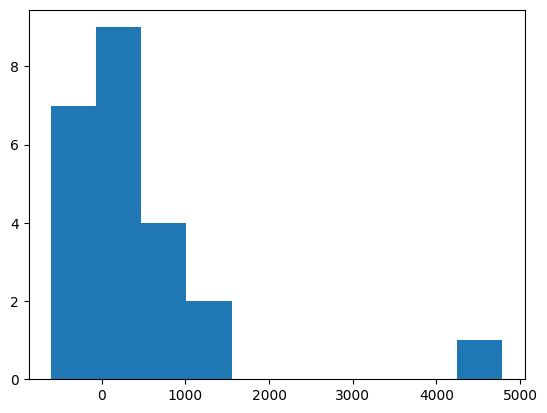

In [ ]:
plt.hist(lasso.coef_)

<ipython-input-27-afc023ef1075>:1: RuntimeWarning: invalid value encountered in log1p
  plt.hist(np.log1p(lasso.coef_))


(array([2., 0., 0., 0., 1., 2., 1., 4., 3., 1.]),
 array([0.        , 0.8473363 , 1.6946726 , 2.54200889, 3.38934519,
        4.23668149, 5.08401779, 5.93135408, 6.77869038, 7.62602668,
        8.47336298]),
 <BarContainer object of 10 artists>)

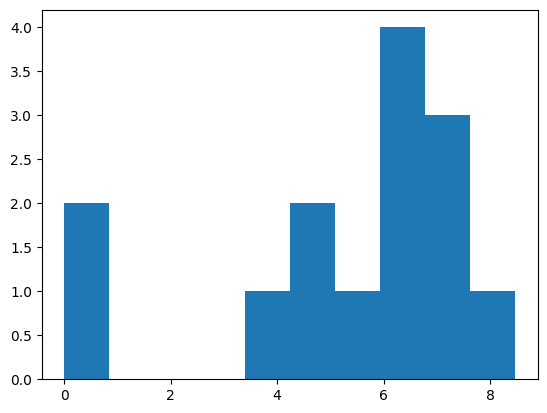

In [ ]:
plt.hist(np.log1p(lasso.coef_))

###**Вывод**:

Были изучены три модели. Они все примерно показали одинаковый результат. Однако:
1. В первой моделе score на тесте был выше чем на train - это говорит о переобучении модели или сильной зависимости между признаками(мультиколлинеарность)

2. У модели с регуляризацией Ridge тоже на test выше score чем на train, что может так же говорить о переобучении. И значение этой модели совпадают практически с первой.
3. У модели с регуляризацией Lasso значение на test чуть ниже чем на train, что говорит о том что модель не переобученна.

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [ ]:
alphas = [0.1, 1, 10, 100, 200]

ridge_norms = []
lasso_norms = []

for alpha in alphas:
  # Ridge
  ridge = Ridge(alpha=alpha).fit(X_train_scaled, y_train)
  ridge_norm = np.linalg.norm(ridge.coef_)
  ridge_norms.append(ridge_norm)

  # Lasso
  lasso = Lasso(alpha=alpha).fit(X_train_scaled, y_train)
  lasso_norm = np.linalg.norm(lasso.coef_)
  lasso_norms.append(lasso_norm)

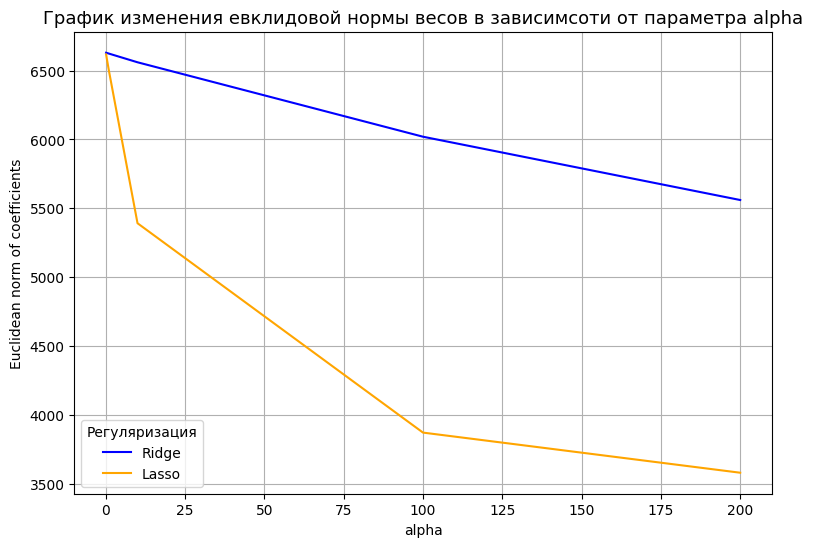

In [ ]:
plt.figure(figsize = (9,6))
plt.plot(alphas, ridge_norms,
         color = "blue")

plt.plot(alphas, lasso_norms,
         color = "orange")
plt.title("График изменения евклидовой нормы весов в зависимсоти от параметра alpha",
          fontsize = 13)
plt.xlabel("alpha")
plt.ylabel("Euclidean norm of coefficients")
plt.legend(title = "Регуляризация", labels = ["Ridge", "Lasso"], loc = "lower left")
plt.grid()
plt.show();

**Задача 3.11 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [ ]:
from sklearn.linear_model import LassoCV

alphas = [0.1, 1, 10, 100, 200]
lasso_cv = LassoCV(alphas = alphas, cv=5, random_state=0)
lasso_cv.fit(X_train_scaled, y_train)
mse_path = lasso_cv.mse_path_

print(f"alphas:", lasso_cv.alphas_)
print('MSE path')
print(mse_path)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1139598866.5661163, tolerance: 48309472.87280814
  model = cd_fast.enet_coordinate_descent_gram(


alphas: [2.e+02 1.e+02 1.e+01 1.e+00 1.e-01]
MSE path
[[2289041.63855461 2083690.24753171 2255249.49809448 2051188.4229844
  2157988.05792546]
 [1901480.76382831 1721241.57521938 1858020.37219109 1678566.8926231
  1801532.49280739]
 [1441418.96420291 1299341.5346319  1383143.11938146 1261209.33072773
  1345866.71794001]
 [1378931.34163413 1242353.13360666 1334006.41012685 1212485.5158069
  1273524.03345716]
 [1377857.86613676 1241613.64668189 1334506.16937347 1239811.61095673
  1272007.32206992]]


In [ ]:
# усреднение по фолдам(строкам)
mean_mse_path = mse_path.mean(axis=1)
#mean_mse = np.mean(mse_path, axis=1)

for alpha, mse in zip (lasso_cv.alphas_, mean_mse_path):
  print(f"alpha:{alpha}, mean mse: {mse}")

alpha_optiml = lasso_cv.alphas_ [np.argmin(mean_mse_path)]
print(f'alpha_optiml:{alpha_optiml}')

alpha:200.0, mean mse: 2167431.5730181322
alpha:100.0, mean mse: 1792168.4193338533
alpha:10.0, mean mse: 1346195.9333768021
alpha:1.0, mean mse: 1288260.086926341
alpha:0.1, mean mse: 1293159.3230437557
alpha_optiml:1.0


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [ ]:
lasso_finall = Lasso(alpha=alpha_optiml, random_state = 0)
lasso_finall.fit(X_train_scaled, y_train)

oefficients = lasso_finall.coef_
intercept = lasso_finall.intercept_

coef_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("Intercept:", intercept)
print("\nCoefficients:")
print(coef_df)


Intercept: 3932.869617034801

Coefficients:
          Feature  Coefficient
0           carat  5278.119984
20    clarity_VS2  1790.842805
19    clarity_VS1  1640.463647
17    clarity_SI1  1573.204421
22   clarity_VVS2  1445.482918
21   clarity_VVS1  1263.347650
3               x -1050.024760
18    clarity_SI2  1016.237239
16     clarity_IF   957.549314
15        color_J  -517.728075
14        color_I  -430.763476
7       cut_Ideal   389.952109
13        color_H  -339.522613
8     cut_Premium   314.449843
9   cut_Very Good   291.047679
12        color_G  -182.693620
6        cut_Good   155.923708
1           depth   -94.266936
11        color_F   -90.947949
10        color_E   -69.580025
2           table   -65.618372
5               z   -40.568623
4               y    -2.647380


###**Вывод**:
Чем коэффициент больше, тем зависимость выше с целевой переменной. Если значение 0 или около нуля, то зависимость маленькая с целевой переменной.

Разумно использовать данные, чьи коэффициенты находятся хотя бы в одном диапазоне (по модулю). Потому что, чем больше коэффициент, тем сильнее будет влияние.

Какие данные использовать, а какие нет, будет зависить от конкретной задачи. Например, на цену безусловно будет влиять: карат, степень частоты, цвет, одно из измерний.  

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [ ]:
rmse_train_finall = mean_squared_error(y_train,lasso_finall.predict(X_train_scaled))**0.5
rmse_test_finall = mean_squared_error(y_test, lasso_finall.predict(X_test_scaled))**0.05

print(f"rmse_train_finall: {rmse_train_finall:.5f}")
print(f"rmse_test_finall: {rmse_test_finall:.5f}")

print(f"r2_score_train_finall:{r2_score(y_train,lasso_finall.predict(X_train_scaled)):.5f} ")
print(f"r2_score_test_finall:{r2_score(y_test,lasso_finall.predict(X_test_scaled )):.5f} ")

rmse_train_finall: 1133.69112
rmse_test_finall: 2.01855
r2_score_train_finall:0.91923 
r2_score_test_finall:0.92079 


####**Сравним данные из задания 3.7 на LineaRegression():**

rmse_train:1133.42925

rmse_test:1122.12259

r2_score_train_lr 0.9192646934980179

r2_score_test_lr 0.9209223221465277



####**с данными из задания 3.13 Lasso-регрессии**:

rmse_train_finall: 1133.69112

rmse_test_finall: 2.01855

r2_score_train_finall:0.91923

r2_score_test_finall:0.92079


##**Вывод**:
Данные что в первом, что во втором варианте схожие. Однако при Lasso-регресии на test rmse получилось достаточно маленьким, что может говорить о оом, что данные подстроиль под тестовую выборку или тестовая выборка маленькая.

В целом и та и другая модель рабочая и показывают хорошие результаты.